In [29]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [30]:
import sys
sys.path.append('../src')
import Bibli_DataScience_3_2 as ds
import CNN_DataScience_2 as cnn

In [33]:
df=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_report.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Unnamed: 0.1',axis=1,inplace=True)
#df.drop('Unnamed: 0.2',axis=1,inplace=True)
df.to_csv(ds.get_RACINE_SAUVEGARDE() +'df_report.csv')
#df= pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rakuten/fichiers/df_report.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categorie  688 non-null    object 
 1   precision  688 non-null    float64
 2   recall     688 non-null    float64
 3   f1-score   688 non-null    float64
 4   support    688 non-null    float64
 5   programme  688 non-null    object 
 6   libelle    688 non-null    object 
 7   id         688 non-null    object 
dtypes: float64(4), object(4)
memory usage: 43.1+ KB


In [45]:
"""
dg=df.copy()
dg.loc[dg['id'] == 'CNN01', 'programme'] = 'Model_Img_Reseau_EfficientNetB1_V01'
dg.loc[dg['id'] == 'CNN01', 'libelle'] = 'EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze DR50-CC1024-NORM-CC1024-DR40-BATCH16'
dg.loc[dg['id'] == 'CNN02', 'libelle'] = 'EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze  POOL-DR40-CC1024-NORM-CC1024-DR40- BATCH16'
valeurs_id = ['CNN01', 'CNN02', 'CNN10']
dg_filtré = dg[dg['id'].isin(valeurs_id)]['programme'].unique()
print(dg_filtré)
"""

['Model_Img_Reseau_RGB_VGG16_V01' 'Model_Img_Reseau_EfficientNetB1_V01'
 'Model_Img_Reseau_RGB_EfficientNetB1_V02']


In [46]:
"""
dg.drop(dg.columns[:11], axis=1, inplace=True)
print(dg.info())
dg.to_csv(ds.get_RACINE_SAUVEGARDE() +'df_report.csv')
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categorie  658 non-null    object 
 1   precision  658 non-null    float64
 2   recall     658 non-null    float64
 3   f1-score   658 non-null    float64
 4   support    658 non-null    float64
 5   programme  658 non-null    object 
 6   libelle    658 non-null    object 
 7   id         658 non-null    object 
dtypes: float64(4), object(4)
memory usage: 41.2+ KB
None


In [34]:
df.head()

,Categorie,precision,recall,f1-score,support,programme,libelle,id
0,10,0.454386,0.431667,0.442735,600.0,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01
1,40,0.409786,0.266932,0.323281,502.0,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01
2,50,0.233161,0.133929,0.170132,336.0,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01
3,60,0.123457,0.180723,0.146699,166.0,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01
4,1140,0.174033,0.353933,0.233333,534.0,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01


In [5]:
df['Categorie'].unique()

array(['10', '40', '50', '60', '1140', '1160', '1180', '1280', '1281',
       '1300', '1301', '1302', '1320', '1560', '1920', '1940', '2060',
       '2220', '2280', '2403', '2462', '2522', '2582', '2583', '2585',
       '2705', '2905', 'accuracy', 'macro avg', 'weighted avg'],
      dtype=object)

In [35]:
df=df[df['Categorie'] !='macro avg']
df=df[df['Categorie'] !='weighted avg']

In [7]:
df['id'].unique()

array(['UNDER01', 'UNDER02', 'UNDER03', 'UNDER04', 'UNDER06', 'UNDER05',
       'CNN03', 'CNN05', 'CNN04', 'CNN06', 'CNN07', 'CNN08', 'CNN25',
       'CNN26', 'CNN10', 'CNN01', 'CNN02', 'CNN21', 'CNN20', 'CNN23',
       'CNN22', 'CNN24'], dtype=object)

In [36]:
valeurs_id = ['CNN01', 'CNN02', 'CNN10','CNN20','CNN21','CNN23','CNN22','CNN24']
df_filtré = df[df['id'].isin(valeurs_id)]['programme'].unique()
print(df_filtré)

['Model_Img_Reseau_RGB_VGG16_V01' 'Model_Img_Reseau_EfficientNetB1_V01'
 'Model_Img_Reseau_RGB_EfficientNetB1_V02'
 'Model_Img_Reseau_InceptionV3_V03' 'Model_Img_Reseau_InceptionV3_V5'
 'Model_Img_Reseau_InceptionV3_V04' 'Model_Img_Reseau_InceptionV3_V02'
 'Model_Img_Reseau_InceptionV3_V01']


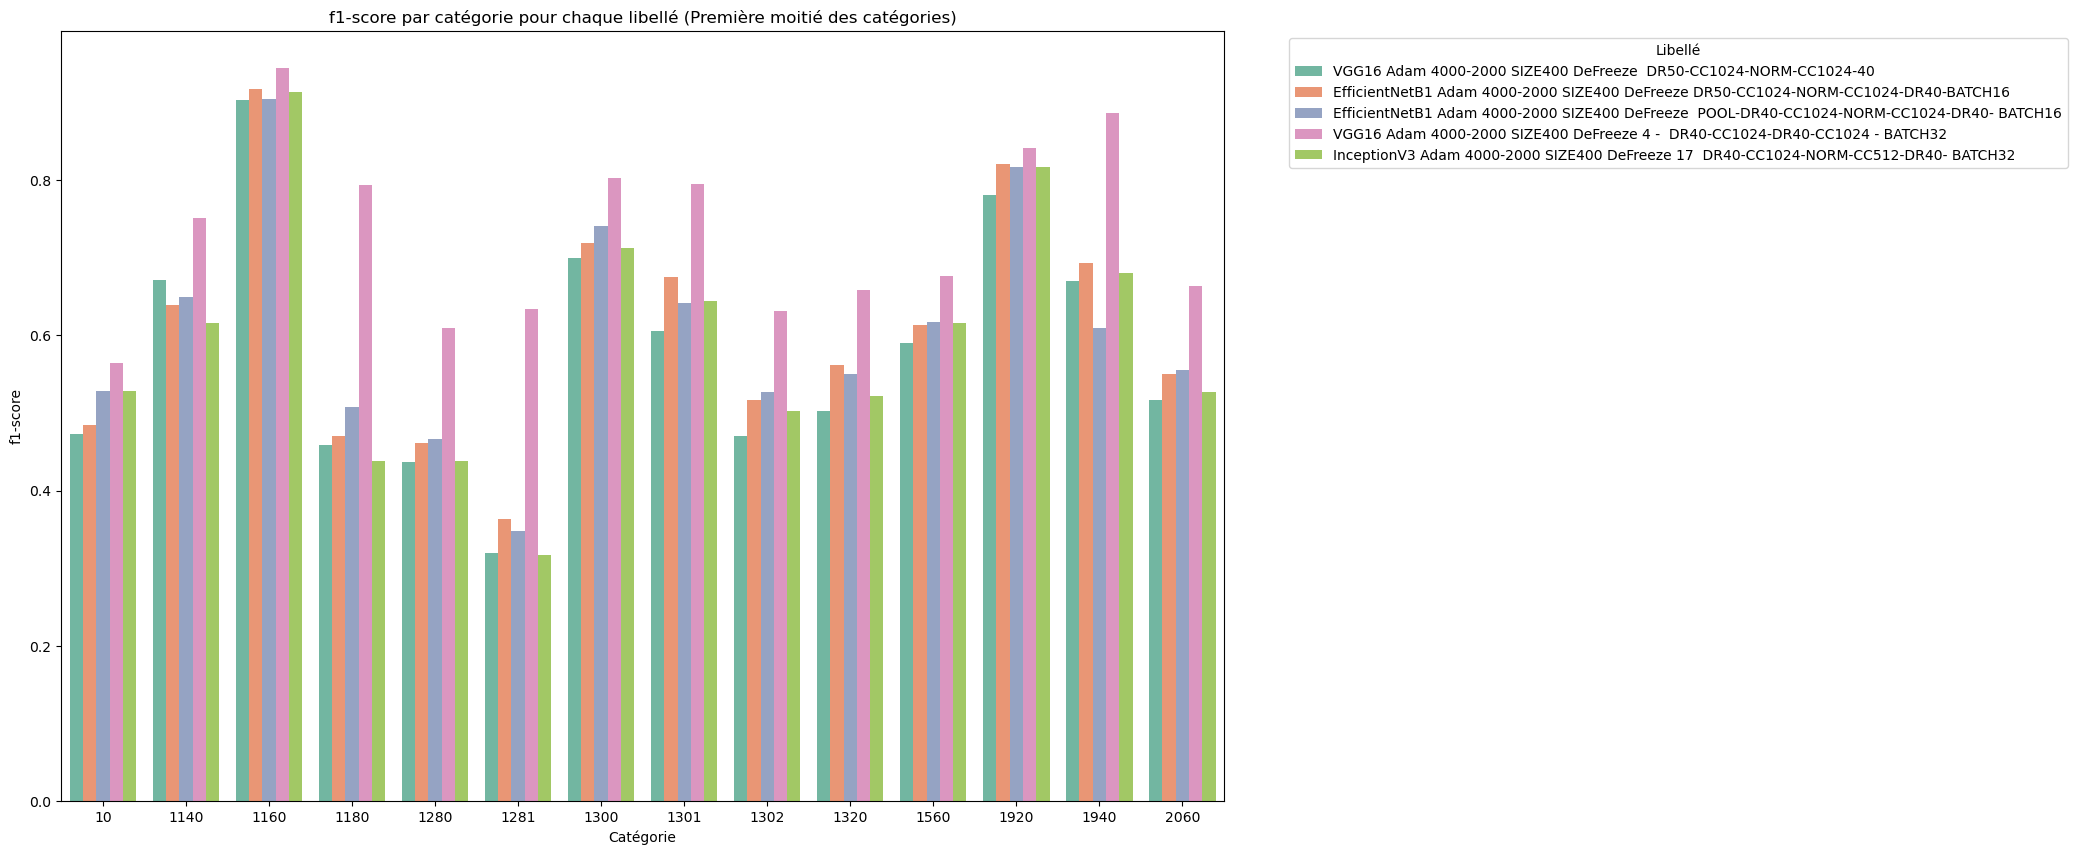

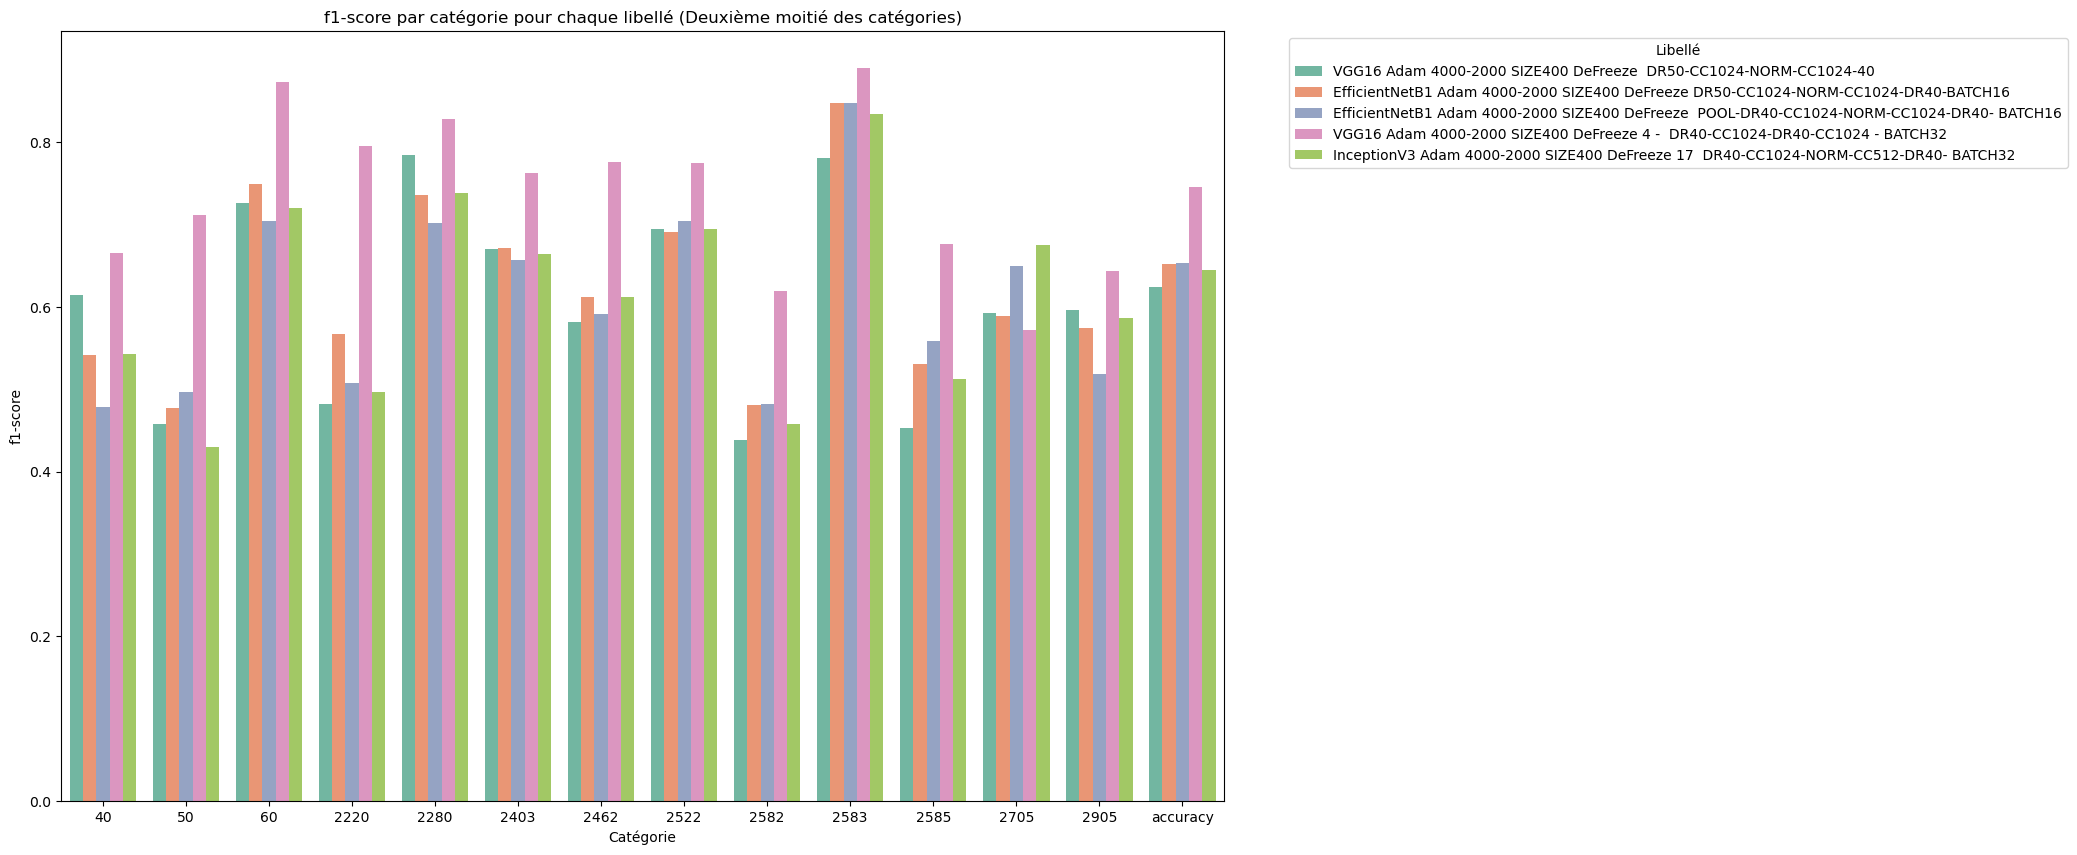

In [37]:

# Split the categories into two dataframes
df_half_length = len(df['Categorie'].unique()) // 2
categories_sorted = sorted(df['Categorie'].unique())
df1_categories = categories_sorted[:df_half_length]
df2_categories = categories_sorted[df_half_length:]

df1 = df[df['Categorie'].isin(df1_categories)]
df2 = df[df['Categorie'].isin(df2_categories)]
df1 = df1[ df1['id'].isin(['CNN01', 'CNN02','CNN10', 'CNN11','CNN20'])]
df2 = df2[ df2['id'].isin(['CNN01', 'CNN02','CNN10', 'CNN11','CNN20'])]

# Set the figure size and color palette for the plot
plt.figure(figsize=(15, 10))
sns.set_palette('Set2')

# Create the bar plot for the first half of categories
sns.barplot(x='Categorie', y='f1-score', hue='libelle', data=df1)

# Set the title and labels for the plot
plt.title('f1-score par catégorie pour chaque libellé (Première moitié des catégories)')
plt.xlabel('Catégorie')
plt.ylabel('f1-score')

# Position the legend outside the plot
plt.legend(title='Libellé', bbox_to_anchor=(1.05, 1), loc='best')

# Display the plot
plt.show()

# Set the figure size and color palette for the second plot
plt.figure(figsize=(15, 10))
sns.set_palette('Set2')

# Create the bar plot for the second half of categories
sns.barplot(x='Categorie', y='f1-score', hue='libelle', data=df2)

# Set the title and labels for the second plot
plt.title('f1-score par catégorie pour chaque libellé (Deuxième moitié des catégories)')
plt.xlabel('Catégorie')
plt.ylabel('f1-score')

# Position the legend outside the second plot
plt.legend(title='Libellé', bbox_to_anchor=(1.05, 1), loc='best')

# Display the second plot
plt.show()


['10', '1140', '1160', '1180', '1280', '1281', '1300', '1301', '1302', '1320', '1560', '1920', '1940', '2060']
['2220', '2280', '2403', '2462', '2522', '2582', '2583', '2585', '2705', '2905', '40', '50', '60', 'accuracy']
['InceptionV3 Adam 4000-2000 SIZE400 DeFreeze  DR40-CC1024-NORM-1024-DR40 - BATCH16'
 'InceptionV3 Adam 4000-2000 SIZE400 DeFreeze  DR30-CC1024-NORM-1024-DR30 - BATCH16'
 'InceptionV3 Adam 4000-2000 SIZE400 DeFreeze  DR40-CC1024-NORM-CC512-DR30 - BATCH16'
 'InceptionV3 Adam 4000-2000 SIZE400 DeFreeze  DR30-CC1024-CC512-DR30 - BATCH16'
 'InceptionV3 Adam 4000-2000 SIZE400 DeFreeze 17  DR40-CC1024-NORM-CC512-DR40- BATCH32']
['InceptionV3 Adam 4000-2000 SIZE400 DeFreeze  DR40-CC1024-NORM-1024-DR40 - BATCH16'
 'InceptionV3 Adam 4000-2000 SIZE400 DeFreeze  DR30-CC1024-NORM-1024-DR30 - BATCH16'
 'InceptionV3 Adam 4000-2000 SIZE400 DeFreeze  DR40-CC1024-NORM-CC512-DR30 - BATCH16'
 'InceptionV3 Adam 4000-2000 SIZE400 DeFreeze  DR30-CC1024-CC512-DR30 - BATCH16'
 'InceptionV3 A

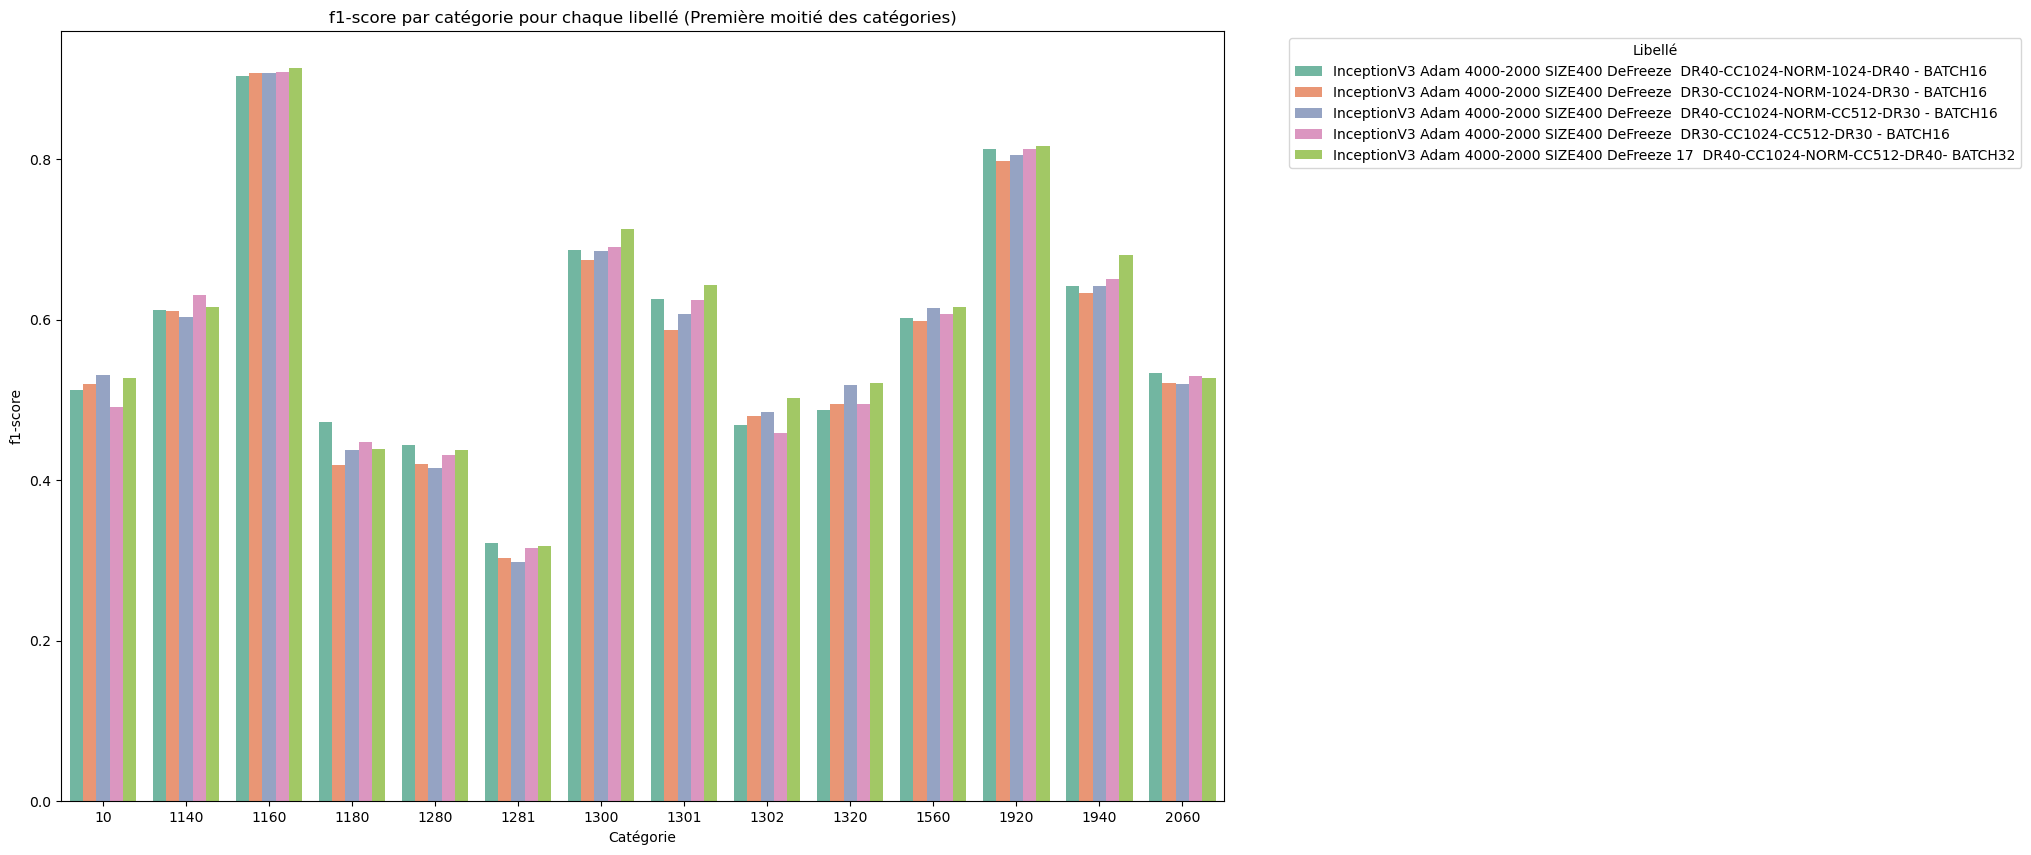

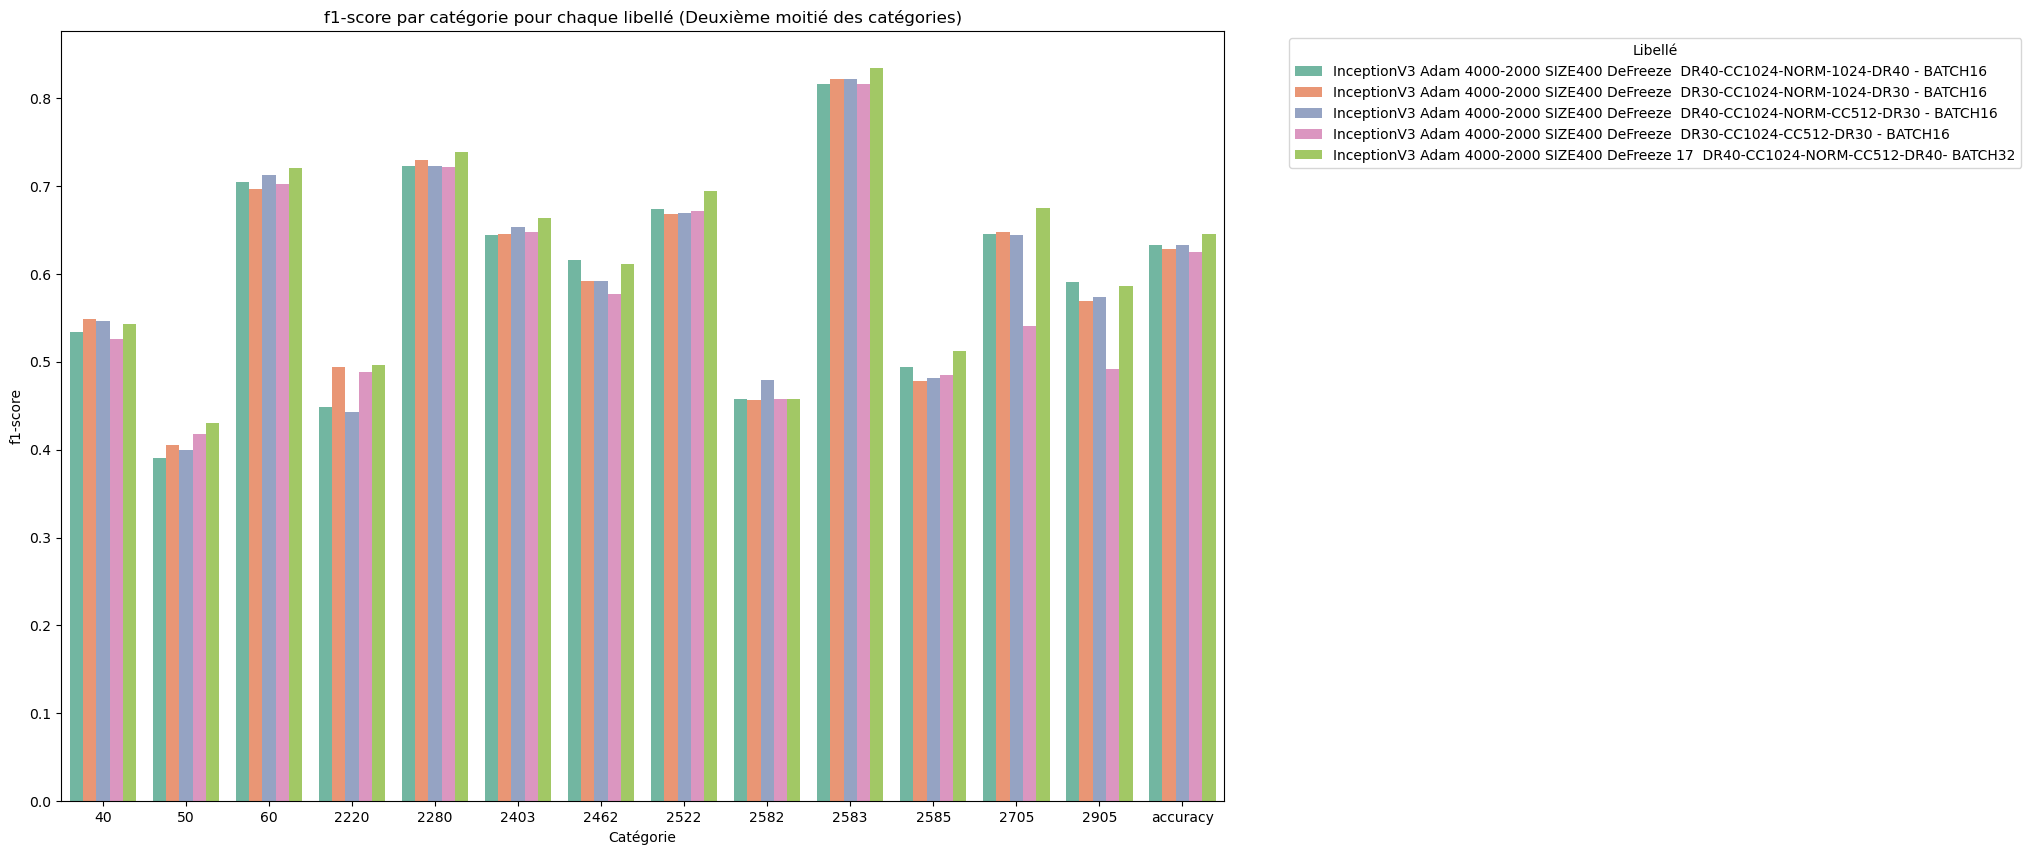

In [38]:
# Split the categories into two dataframes
df_half_length = len(df['Categorie'].unique()) // 2
categories_sorted = sorted(df['Categorie'].unique())
df1_categories = categories_sorted[:df_half_length]
df2_categories = categories_sorted[df_half_length:]


print(df1_categories)
print(df2_categories)

df1 = df[df['Categorie'].isin(df1_categories)]
df2 = df[df['Categorie'].isin(df2_categories)]
#df1 = df1[ df1['id'].isin(['UNDER01', 'CNN01', 'CNN02', 'CNN03','CNN04','CNN05','CNN06'])]
#df2 = df2[ df2['id'].isin(['UNDER01', 'CNN01', 'CNN02', 'CNN03','CNN04','CNN05','CNN06'])]
df1 = df1[ df1['id'].isin(['CNN20','CNN21','CNN23','CNN22','CNN24'])]
df2 = df2[ df2['id'].isin(['CNN20','CNN21','CNN23','CNN22','CNN24'])]

print(df1['libelle'].unique())
print(df2['libelle'].unique())

# Set the figure size and color palette for the plot
plt.figure(figsize=(15, 10))
sns.set_palette('Set2')

# Create the bar plot for the first half of categories
sns.barplot(x='Categorie', y='f1-score', hue='libelle', data=df1)

# Set the title and labels for the plot
plt.title('f1-score par catégorie pour chaque libellé (Première moitié des catégories)')
plt.xlabel('Catégorie')
plt.ylabel('f1-score')

# Position the legend outside the plot
plt.legend(title='Libellé', bbox_to_anchor=(1.05, 1), loc='best')

# Display the plot
plt.show()

# Set the figure size and color palette for the second plot
plt.figure(figsize=(15, 10))
sns.set_palette('Set2')

# Create the bar plot for the second half of categories
sns.barplot(x='Categorie', y='f1-score', hue='libelle', data=df2)

# Set the title and labels for the second plot
plt.title('f1-score par catégorie pour chaque libellé (Deuxième moitié des catégories)')
plt.xlabel('Catégorie')
plt.ylabel('f1-score')

# Position the legend outside the second plot
plt.legend(title='Libellé', bbox_to_anchor=(1.05, 1), loc='best')

# Display the second plot
plt.show()

In [39]:
df.groupby(['id','libelle', 'programme'])[['f1-score','precision']].max()

,,,f1-score,precision
id,libelle,programme,,
CNN01,EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze DR50-CC1024-NORM-CC1024-DR40-BATCH16,Model_Img_Reseau_EfficientNetB1_V01,0.917545,0.900243
CNN02,EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze POOL-DR40-CC1024-NORM-CC1024-DR40- BATCH16,Model_Img_Reseau_RGB_EfficientNetB1_V02,0.905055,0.883273
CNN03,efficientNet RGB max 2500 lr=0.01->0.0042 DR20-20,Modele_IMG_Reseau_RGB,0.880077,0.852060
CNN04,modele perso RGB max 2500 lr=0.0001 DR10,Modele_Img_Reseau_RGB_personnalise,0.818444,0.825581
CNN05,efficientNet RGB max 4000 lr=0.01->0.0042 DR20-20,Modele_IMG_Reseau_RGB,0.909661,0.902864
CNN06,modele perso RGB max 2500 lr=0.0001 DR20,Modele_Img_Reseau_RGB_personnalise,0.873900,0.897590
CNN07,modele perso RGB max 4000 Generation l1=0.001 DR10,Model_img_reseau_RGB_personnalise_Gener_L1,0.846591,0.837079
CNN08,modele perso RGB max 6000 Generation l2=0.01 DR50,Model_img_reseau_RGB_personnalise_Gener_L2,0.903047,0.871658
CNN10,VGG16 Adam 4000-2000 SIZE400 DeFreeze DR50-CC1024-NORM-CC1024-40,Model_Img_Reseau_RGB_VGG16_V01,0.902666,0.885645


In [40]:
df2=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_val_accuracy.csv')

In [41]:
df2.info

<bound method DataFrame.info of      Unnamed: 0  Epoch  val_accuracy                               programme  \
0             0      1      0.181025  Modele_IMG_Reseau_images_undersampling   
1             1      2      0.214916  Modele_IMG_Reseau_images_undersampling   
2             2      3      0.211974  Modele_IMG_Reseau_images_undersampling   
3             3      4      0.223237  Modele_IMG_Reseau_images_undersampling   
4             4      5      0.230238  Modele_IMG_Reseau_images_undersampling   
..          ...    ...           ...                                     ...   
835          35     36      0.644842        Model_Img_Reseau_InceptionV3_V01   
836          36     37      0.645195        Model_Img_Reseau_InceptionV3_V01   
837          37     38      0.645372        Model_Img_Reseau_InceptionV3_V01   
838          38     39      0.644960        Model_Img_Reseau_InceptionV3_V01   
839          39     40      0.645078        Model_Img_Reseau_InceptionV3_V01   

       

In [42]:
df2.head()

,Unnamed: 0,Epoch,val_accuracy,programme,libelle,id
0,0,1,0.181025,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01
1,1,2,0.214916,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01
2,2,3,0.211974,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01
3,3,4,0.223237,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01
4,4,5,0.230238,Modele_IMG_Reseau_images_undersampling,undersampling max 2400,UNDER01


In [43]:
valeurs_id = ['CNN01', 'CNN02', 'CNN10','CNN11','CNN20','CNN21', 'CNN22','CNN23','CNN24']
df_filtré = df2[df2['id'].isin(valeurs_id)]['programme'].unique()
print(df_filtré)

['Model_Img_Reseau_RGB_VGG16_V01' 'Model_Img_Reseau_EfficientNetB1_V01'
 'Model_Img_Reseau_RGB_EfficientNetB1_V02'
 'Model_Img_Reseau_InceptionV3_V03' 'Model_Img_Reseau_InceptionV3_V5'
 'Model_Img_Reseau_InceptionV3_V04' 'Model_Img_Reseau_InceptionV3_V02'
 'Model_Img_Reseau_InceptionV3_V01']


In [72]:
"""
dg=df2.copy()
dg.loc[dg['id'] == 'CNN01', 'programme'] = 'Model_Img_Reseau_EfficientNetB1_V01'
dg.loc[dg['id'] == 'CNN01', 'libelle'] = 'EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze DR50-CC1024-NORM-CC1024-DR40-BATCH16'
dg.loc[dg['id'] == 'CNN02', 'libelle'] = 'EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze  POOL-DR40-CC1024-NORM-CC1024-DR40- BATCH16'
valeurs_id = ['CNN01', 'CNN02', 'CNN10','CNN20']
dg_filtré = dg[dg['id'].isin(valeurs_id)]['programme'].unique()
print(dg_filtré)
"""

['Model_Img_Reseau_RGB_VGG16_V01' 'Model_Img_Reseau_EfficientNetB1_V01'
 'Model_Img_Reseau_RGB_EfficientNetB1_V02'
 'Model_Img_Reseau_RGB_RESNET50_V01']


In [73]:
"""
dg.drop(dg.columns[:1], axis=1, inplace=True)
print(dg.info())
dg.to_csv(ds.get_RACINE_SAUVEGARDE() +'df_val_accuracy.csv')
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Epoch         800 non-null    int64  
 1   val_accuracy  800 non-null    float64
 2   programme     800 non-null    object 
 3   libelle       800 non-null    object 
 4   id            800 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 31.4+ KB
None


C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shaky\AppData\Local\anaconda3\envs\

<Figure size 1500x1000 with 0 Axes>

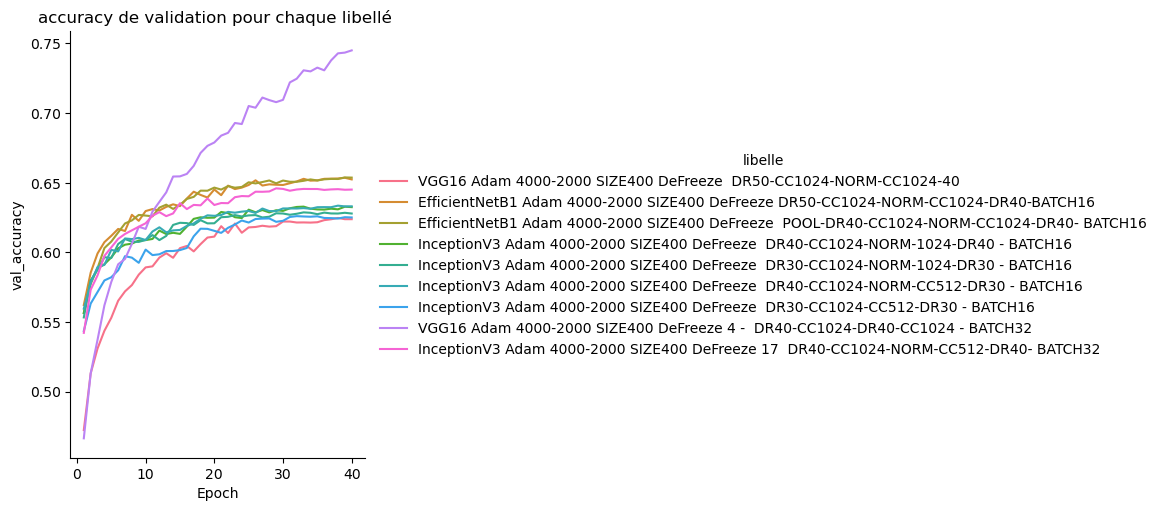

In [44]:
import numpy as np
df2=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_val_accuracy.csv')
df2 = df2.replace([np.inf, -np.inf], np.nan)
#df2= pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rakuten/fichiers/df_val_accuracy.csv')
df2 = df2[ df2['id'].isin(['CNN01', 'CNN02', 'CNN10','CNN11','CNN20','CNN21', 'CNN22','CNN23','CNN24'])]
plt.figure(figsize=(15, 10))
sns.set_palette('Set2')
sns.relplot(x='Epoch', y='val_accuracy', hue='libelle',kind='line', data=df2)

# Set the title and labels for the plot
plt.title("accuracy de validation pour chaque libellé ")
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')

# Position the legend outside the plot
#plt.legend(title='Libellé', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()



In [45]:
df2=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_val_accuracy.csv')
df2['id'].unique()

array(['UNDER01', 'UNDER03', 'UNDER02', 'UNDER04', 'UNDER06', 'UNDER05',
       'CNN03', 'CNN05', 'CNN04', 'CNN06', 'CNN07', 'CNN08', 'CNN10',
       'CNN01', 'CNN02', 'CNN22', 'CNN24', 'CNN23', 'CNN21', 'CNN11',
       'CNN20'], dtype=object)

In [46]:
df3=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_accuracy.csv')

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  800 non-null    int64  
 1   Epoch       800 non-null    int64  
 2   accuracy    800 non-null    float64
 3   programme   800 non-null    object 
 4   libelle     800 non-null    object 
 5   id          800 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 37.6+ KB


In [47]:
valeurs_id = ['CNN01', 'CNN02', 'CNN10','CNN11','CNN20','CNN21', 'CNN22','CNN23','CNN24']
df_filtré = df3[df3['id'].isin(valeurs_id)]['programme'].unique()
print(df_filtré)

['Model_Img_Reseau_RGB_VGG16_V01' 'Model_Img_Reseau_EfficientNetB1_V01'
 'Model_Img_Reseau_RGB_EfficientNetB1_V02'
 'Model_Img_Reseau_InceptionV3_V03' 'Model_Img_Reseau_InceptionV3_V5'
 'Model_Img_Reseau_InceptionV3_V04' 'Model_Img_Reseau_InceptionV3_V02'
 'Model_Img_Reseau_InceptionV3_V01']


In [92]:
"""
dg=df3.copy()
dg.loc[dg['id'] == 'CNN01', 'programme'] = 'Model_Img_Reseau_EfficientNetB1_V01'
dg.loc[dg['id'] == 'CNN01', 'libelle'] = 'EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze DR50-CC1024-NORM-CC1024-DR40-BATCH16'
dg.loc[dg['id'] == 'CNN02', 'libelle'] = 'EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze  POOL-DR40-CC1024-NORM-CC1024-DR40- BATCH16'
valeurs_id = ['CNN01', 'CNN02', 'CNN10','CNN20']
dg_filtré = dg[dg['id'].isin(valeurs_id)]['programme'].unique()
print(dg_filtré)
"""

['Model_Img_Reseau_RGB_VGG16_V01' 'Model_Img_Reseau_EfficientNetB1_V01'
 'Model_Img_Reseau_RGB_EfficientNetB1_V02'
 'Model_Img_Reseau_RGB_RESNET50_V01']


In [93]:
"""
dg.drop(dg.columns[:1], axis=1, inplace=True)
print(dg.info())
dg.to_csv(ds.get_RACINE_SAUVEGARDE() +'df_accuracy.csv')
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Epoch      800 non-null    int64  
 1   accuracy   800 non-null    float64
 2   programme  800 non-null    object 
 3   libelle    800 non-null    object 
 4   id         800 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 31.4+ KB
None


C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shaky\AppData\Local\anaconda3\envs\

<Figure size 1500x1000 with 0 Axes>

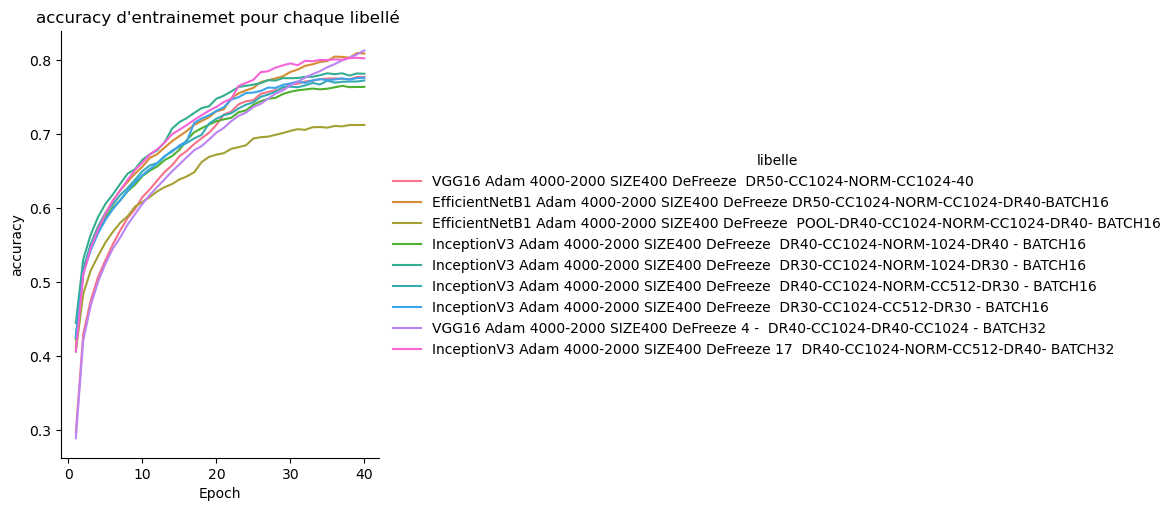

In [48]:
df3=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_accuracy.csv')
#df3= pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rakuten/fichiers/df_accuracy.csv')
df3 = df3[ df3['id'].isin(['CNN01', 'CNN02', 'CNN10','CNN11','CNN20','CNN21', 'CNN22','CNN23','CNN24'])]
#df3.head(120)
plt.figure(figsize=(15, 10))
sns.set_palette('Set2')
sns.relplot(x='Epoch', y='accuracy', hue='libelle',kind='line', data=df3)

# Set the title and labels for the plot
plt.title("accuracy d'entrainemet pour chaque libellé ")
plt.xlabel('Epoch')
plt.ylabel('accuracy')

# Position the legend outside the plot
#plt.legend(title='Libellé', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shaky\AppData\Local\anaconda3\envs\

<Figure size 1500x1000 with 0 Axes>

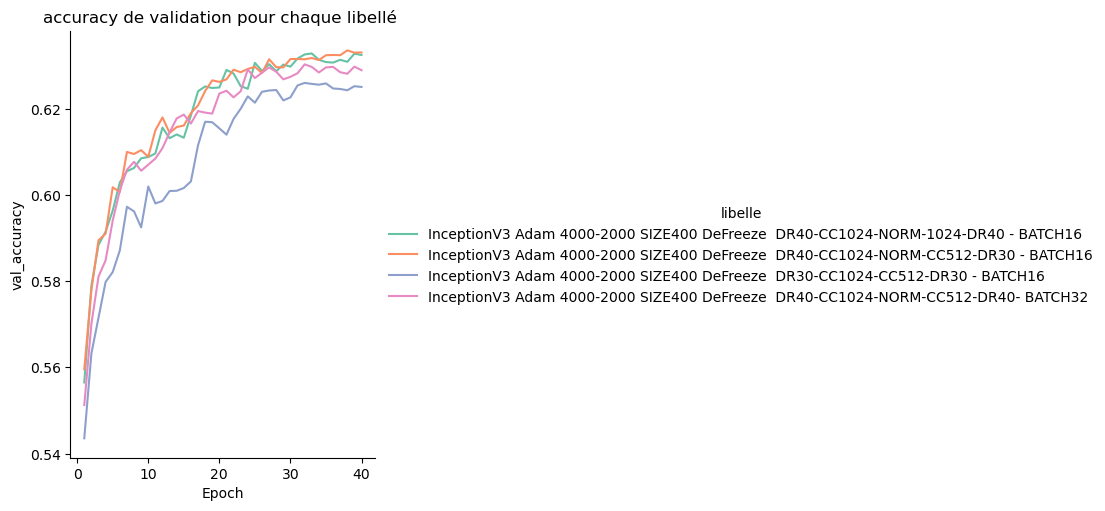

In [25]:
df2=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_val_accuracy.csv')
#df2= pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rakuten/fichiers/df_val_accuracy.csv')
df2 = df2[ df2['id'].isin(['CNN20', 'CNN25','CNN22','CNN21','CNN23','CNN26','CNN27'])]
#df2.head(120)
plt.figure(figsize=(15, 10))
sns.set_palette('Set2')
sns.relplot(x='Epoch', y='val_accuracy', hue='libelle',kind='line', data=df2)

# Set the title and labels for the plot
plt.title("accuracy de validation pour chaque libellé ")
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')

# Position the legend outside the plot
#plt.legend(title='Libellé', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()



C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaky\AppData\Local\anaconda3\envs\tfdml_cnn_Rakuten\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\shaky\AppData\Local\anaconda3\envs\

<Figure size 1500x1000 with 0 Axes>

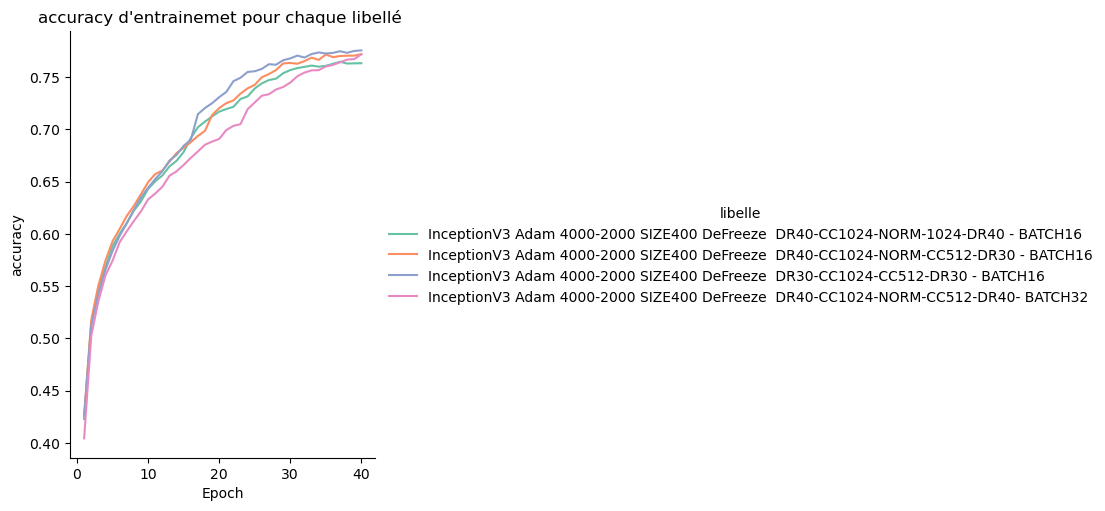

In [26]:
df3=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_accuracy.csv')
#df3= pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rakuten/fichiers/df_accuracy.csv')
df3 = df3[ df3['id'].isin(['CNN20', 'CNN25', 'CNN22','CNN21','CNN23','CNN26','CNN27'])]
#df3.head(120)
plt.figure(figsize=(15, 10))
sns.set_palette('Set2')
sns.relplot(x='Epoch', y='accuracy', hue='libelle',kind='line', data=df3)

# Set the title and labels for the plot
plt.title("accuracy d'entrainemet pour chaque libellé ")
plt.xlabel('Epoch')
plt.ylabel('accuracy')

# Position the legend outside the plot
#plt.legend(title='Libellé', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [27]:
df4=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_val_accuracy.csv')
df4.groupby(['id', 'libelle', 'programme']).agg({'val_accuracy': 'max'}).reset_index()


,id,libelle,programme,val_accuracy
0,CNN01,EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze...,Model_Img_Reseau_EfficientNetB1_V01,0.653556
1,CNN02,EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze...,Model_Img_Reseau_RGB_EfficientNetB1_V02,0.653792
2,CNN03,efficientNet RGB max 2500 lr=0.01->0.0042 DR20-20,Modele_IMG_Reseau_RGB,0.608917
3,CNN04,modele perso RGB max 2500 lr=0.0001 DR10,Modele_Img_Reseau_RGB_personnalise,0.291020
4,CNN05,efficientNet RGB max 4000 lr=0.01->0.0042 DR20-20,Modele_IMG_Reseau_RGB,0.641586
5,CNN06,modele perso RGB max 2500 lr=0.0001 DR20,Modele_Img_Reseau_RGB_personnalise,0.323073
6,CNN07,modele perso RGB max 4000 Generation l1=0.001 ...,Model_img_reseau_RGB_personnalise_Gener_L1,0.345410
7,CNN08,modele perso RGB max 5000 Generation l1=0.01 DR10,Model_img_reseau_RGB_personnalise_Gener_L2,0.363294
8,CNN10,VGG16 Adam 4000-2000 SIZE400 DeFreeze DR50-CC...,Model_Img_Reseau_RGB_VGG16_V01,0.624702
9,CNN11,VGG16 Adam 4000-2000 SIZE400 DeFreeze 4 - DR4...,Model_Img_Reseau_RGB_VGG16_V01,0.744995


In [28]:
df5=pd.read_csv(ds.get_RACINE_SAUVEGARDE() +'df_accuracy.csv')
df5.groupby(['id', 'libelle', 'programme']).agg({'accuracy': 'max'}).reset_index()

,id,libelle,programme,accuracy
0,CNN01,EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze...,Model_Img_Reseau_EfficientNetB1_V01,0.809101
1,CNN02,EfficientNetB1 Adam 4000-2000 SIZE400 DeFreeze...,Model_Img_Reseau_RGB_EfficientNetB1_V02,0.711892
2,CNN03,efficientNet RGB max 2500 lr=0.01->0.0042 DR20-20,Modele_IMG_Reseau_RGB,0.815883
3,CNN04,modele perso RGB max 2500 lr=0.0001 DR10,Modele_Img_Reseau_RGB_personnalise,0.765597
4,CNN05,efficientNet RGB max 4000 lr=0.01->0.0042 DR20-20,Modele_IMG_Reseau_RGB,0.844715
5,CNN06,modele perso RGB max 2500 lr=0.0001 DR20,Modele_Img_Reseau_RGB_personnalise,0.630766
6,CNN07,modele perso RGB max 4000 Generation l1=0.001 ...,Model_img_reseau_RGB_personnalise_Gener_L1,0.850661
7,CNN08,modele perso RGB max 5000 Generation l1=0.01 DR10,Model_img_reseau_RGB_personnalise_Gener_L2,0.768718
8,CNN10,VGG16 Adam 4000-2000 SIZE400 DeFreeze DR50-CC...,Model_Img_Reseau_RGB_VGG16_V01,0.776721
9,CNN11,VGG16 Adam 4000-2000 SIZE400 DeFreeze 4 - DR4...,Model_Img_Reseau_RGB_VGG16_V01,0.812568


#--------------------------

In [5]:
VERSION = "_V01"
SUFFIXE_FICHIER = "EfficientNetB1" + VERSION

In [11]:
chemin_du_fichier = ds.get_RACINE_SAUVEGARDE() +'param_grid_'+SUFFIXE_FICHIER+'.csv'
noms_de_colonnes = ['Modele','Lrate', 'NbNeurones_Layer1', 'NbNeurones_Layer2','Dropout','Accuracy','Loss','Val_accuracy','Val_loss']

df_reseaux = pd.DataFrame(columns=noms_de_colonnes)    
# Vérifiez si le fichier existe
if os.path.isfile(chemin_du_fichier):
    # Le fichier existe, le lire
    df_reseaux = pd.read_csv(chemin_du_fichier)
    print("Fichier existant lu avec succès.")
    print(df_reseaux['Lrate'].value_counts())
    print(df_reseaux['NbNeurones_Layer1'].value_counts())
    print(df_reseaux['Dropout'].value_counts())
else:
    # Le fichier n'existe pas, créer un nouveau DataFrame et le sauvegarder
    df_reseaux = pd.DataFrame(columns=noms_de_colonnes)    

Fichier existant lu avec succès.
Lrate
0.00001    18
Name: count, dtype: int64
NbNeurones_Layer1
1024    6
512     6
128     6
Name: count, dtype: int64
Dropout
0.2    6
0.3    6
0.4    6
Name: count, dtype: int64


In [13]:
df_reseaux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         18 non-null     int64  
 1   Modele             18 non-null     object 
 2   Lrate              18 non-null     float64
 3   NbNeurones_Layer1  18 non-null     int64  
 4   NbNeurones_Layer2  18 non-null     int64  
 5   Dropout            18 non-null     float64
 6   Accuracy           18 non-null     object 
 7   Loss               18 non-null     object 
 8   Val_accuracy       18 non-null     object 
 9   Val_loss           18 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.5+ KB


In [16]:
df_reseaux['Val_accuracy']

0     [0.3001633584499359, 0.3259831666946411, 0.371...
1     [0.13695187866687775, 0.23489132523536682, 0.3...
2     [0.3031787872314453, 0.34369897842407227, 0.36...
3     [0.1441764086484909, 0.25015705823898315, 0.31...
4     [0.34539514780044556, 0.3912551999092102, 0.41...
5     [0.11163462698459625, 0.21101897954940796, 0.2...
6     [0.34822213649749756, 0.41368263959884644, 0.4...
7     [0.15158939361572266, 0.25166478753089905, 0.3...
8     [0.3441387116909027, 0.3872345983982086, 0.422...
9     [0.17376555502414703, 0.2806885242462158, 0.33...
10    [0.40733760595321655, 0.4510616958141327, 0.46...
11    [0.0814172625541687, 0.18186958134174347, 0.25...
12    [0.37586382031440735, 0.4423922598361969, 0.47...
13    [0.10616911947727203, 0.17941953241825104, 0.2...
14    [0.3882397413253784, 0.4246136546134949, 0.465...
15    [0.14097248017787933, 0.22747832536697388, 0.2...
16    [0.4596683084964752, 0.5027641654014587, 0.530...
17    [0.1428571492433548, 0.21416006982326508, 

In [35]:
print(type(df_reseaux.loc[3,'Val_accuracy']))
df_reseaux.loc[3,'Val_accuracy']

<class 'str'>


'[0.1441764086484909, 0.25015705823898315, 0.3118482232093811, 0.35406458377838135]'

In [36]:
df_reseaux['Val_acc']=df_reseaux['Val_accuracy'].apply(lambda x : eval(x)[3])

In [37]:
df_reseaux[['Modele','Lrate','NbNeurones_Layer1','Dropout','Val_acc']].sort_values('Val_acc',ascending=False)

,Modele,Lrate,NbNeurones_Layer1,Dropout,Val_acc
16,Adam,0.00001,128,0.4,0.537253
10,Adam,0.00001,512,0.4,0.494849
12,Adam,0.00001,128,0.2,0.494158
14,Adam,0.00001,128,0.3,0.480965
8,Adam,0.00001,512,0.3,0.445408
6,Adam,0.00001,512,0.2,0.443774
4,Adam,0.00001,1024,0.4,0.431273
0,Adam,0.00001,1024,0.2,0.395778
2,Adam,0.00001,1024,0.3,0.386669
9,SGD,0.00001,512,0.3,0.375550


In [39]:
df_reseaux[['Modele','Lrate','NbNeurones_Layer1','Dropout','Val_acc']].nlargest(5,'Val_acc')

,Modele,Lrate,NbNeurones_Layer1,Dropout,Val_acc
16,Adam,0.00001,128,0.4,0.537253
10,Adam,0.00001,512,0.4,0.494849
12,Adam,0.00001,128,0.2,0.494158
14,Adam,0.00001,128,0.3,0.480965
8,Adam,0.00001,512,0.3,0.445408
